In [15]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt(open("ex1data2.txt"),delimiter = ',')
#print(data)
X = np.array(data[:,0:2])
#X = np.c_[X,data[:,1]]
y = np.array(data[:,2])
y.shape = (len(y),1)
theta = np.zeros((3,1))
#size, bedrooms -> price


#print(X)
print(X)
print(y)
print(theta)
print("X = ", X.shape)
print("Theta = ",theta.shape)
print("y = ",y.shape)

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000e+00]
 [2.567e+03 4.000e+00]
 [1.200e+03

In [2]:
#mu = np.zeros((1,np.size(X,1)))
#for x in range(0,np.size(X,1)):
   # mu[0][x] = np.mean(X[:,x])
#print(mu)
#X = X - mu
#print(X)

(47, 2)
Initial cost with zero thetas :  65591548106.45744
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
Final cost :  2105448288.6292474
Final theta :  [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


Text(0, 0.5, 'Value of cost fn')

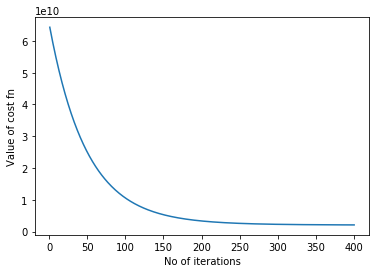

In [16]:
def FeatureNormalise(X):
    X_norm = X
    mu = np.zeros((1,np.size(X,1)))
    sigma = np.zeros((1,np.size(X,1)))
    mu[0][0] = np.mean(X[:,0])
    mu[0][1] = np.mean(X[:,1])
    X_norm = X - np.tile(mu,(len(X),1))
    sigma[0][0] = np.std(X[:,0])
    sigma[0][1] = np.std(X[:,1])
    X_norm = X_norm / np.tile(sigma,(len(X),1))
    print(X_norm.shape)
    return X_norm
     
    
    


def computeCost(X,y,theta):
    m = len(y)
    J = 0
    new_arr = (np.dot(X,theta) - y)
    #print(new_arr)
    new_arr = np.square(new_arr)
    sq = np.sum(new_arr)
    J = sq * (1/(2*m))
    return J
    
def GradientDescent(X,y,theta,alpha,iterations):
    m = len(y)
    J_history = np.array([])
    for x in range(iterations):
        pred = np.dot(X,theta)
        delta = (1/m)*np.dot( (pred-y).transpose(),X).transpose()
        #print(delta.shape)
        theta = theta - alpha*delta
        newCost = computeCost(X,y,theta)
        J_history = np.append(J_history,newCost)
    print(theta)    
    return theta,J_history

X = FeatureNormalise(X)
A = np.ones(len(y))
X = np.c_[A,X]    
alpha = 0.01
iterations = 400
cost = computeCost(X,y,theta)
print("Initial cost with zero thetas : ",cost)

theta,J_history = GradientDescent(X,y,theta,alpha,iterations)
print(theta)
J_history.shape = (iterations,1)
print("Final cost : ", computeCost(X,y,theta))
print("Final theta : ",theta)
#print(J_history)
iterator = [x for x in range(1,iterations+1)]
plt.plot(iterator,J_history)
plt.xlabel("No of iterations")
plt.ylabel("Value of cost fn")